In [7]:
import numpy as np
import sys
sys.path.append('../../')
sys.path.append('../../pyfos/')
from pyfos.models.feedforward import build_feedforward
from pyfos.generic.optimizer import gd_optimizer
from pyfos.generic.regularizers import gaus_prior
from functools import partial 
from pyfos.tc.simple import  simple_tc
from pyfos.tc.cv import  cv_tc
from pyfos.hyperoptimizers.random_search import random_optimize
from pyfos.hyperoptimizers.greed_optimize import greed_optimize
import theano
%matplotlib inline
import matplotlib.pylab as plt
import random
import cPickle

In [8]:
with open('./data/results_cv_mad.pckl', 'rb') as inp:
    mad = cPickle.load(inp)
with open('./data/results_cv_rand.pckl', 'rb') as inp:
    rand = cPickle.load(inp)    
with open('./data/results_cv_greed.pckl', 'rb') as inp:
    greed = cPickle.load(inp)
with open('./data/results_cv_hoag.pckl', 'rb') as inp:
    hoag = cPickle.load(inp)

#X_train, X_test = np.load('../../../data/W_X_Tr.npy'), np.load('../../../data/W_X_Test.npy')
#Y_train, Y_test = np.load('../../../data/W_Y_Tr.npy'), np.load('../../../data/W_Y_Test.npy')



In [9]:
with open('./acc_results_cv_mad.pckl', 'rb') as inp:
    amad = cPickle.load(inp)
with open('./acc_results_cv_rand.pckl', 'rb') as inp:
    arand = cPickle.load(inp)    
with open('./acc_results_cv_greed.pckl', 'rb') as inp:
    agreed = cPickle.load(inp)
with open('./acc_results_cv_hoag.pckl', 'rb') as inp:
    ahoag = cPickle.load(inp)

#X_train, X_test = np.load('../../../data/W_X_Tr.npy'), np.load('../../../data/W_X_Test.npy')
#Y_train, Y_test = np.load('../../../data/W_Y_Tr.npy'), np.load('../../../data/W_Y_Test.npy')



In [9]:
agreed


[[0.019199999999999998,
  0.026200000000000001,
  0.0292,
  0.034799999999999998,
  0.030800000000000001,
  0.036900000000000002],
 [0.017299999999999999,
  0.0184,
  0.019099999999999999,
  0.019699999999999999,
  0.019400000000000001,
  0.0178],
 [0.020299999999999999,
  0.018200000000000001,
  0.019400000000000001,
  0.0189,
  0.017899999999999999,
  0.018499999999999999],
 [0.038899999999999997,
  0.021700000000000001,
  0.021999999999999999,
  0.0218,
  0.024500000000000001,
  0.0235],
 [0.017100000000000001,
  0.018200000000000001,
  0.019699999999999999,
  0.018599999999999998,
  0.017399999999999999,
  0.017600000000000001]]

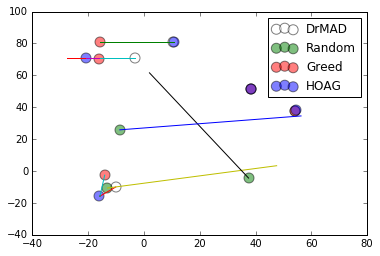

In [4]:
#plt.matshow(matrix.T)
for dataset, label, c in [(mad, 'DrMAD', 'w'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                        ]:
    first = True
    for i in dataset:
        first_value = i.history[0][0][0]
        i = i.best_values[0]
        
        first_value = np.log10(np.exp(2*first_value))*10
        i = np.log10(np.exp(2*i))*10
        if first:
            plt.scatter(i[0] + np.random.randn(1)*0.1,i[1]+ np.random.randn(1)*0.1, c=c, label=label, alpha=0.5, s=100)
            first = False
        else:
            plt.scatter(i[0]+ np.random.randn(1)*0.1,i[1]+ np.random.randn(1)*0.1, c=c, alpha=0.5, s=100)
        #print [first_value[0], i[0]],[first_value[1], i[1]]
        plt.plot([first_value[0], i[0]],[first_value[1], i[1]])
        
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = (20,20)
#plt.scatter(2713%100 ,2713/100, s=1000)


In [11]:
arand

[[0.019300000000000001,
  0.019,
  0.018100000000000002,
  0.018100000000000002,
  0.018499999999999999],
 [0.017899999999999999,
  0.019699999999999999,
  0.017100000000000001,
  0.019300000000000001,
  0.0178],
 [0.018100000000000002,
  0.0183,
  0.017600000000000001,
  0.018599999999999998,
  0.019],
 [0.017999999999999999,
  0.019300000000000001,
  0.019599999999999999,
  0.019300000000000001,
  0.019099999999999999],
 [0.017600000000000001,
  0.0177,
  0.018599999999999998,
  0.019,
  0.019599999999999999],
 [0.018499999999999999,
  0.019,
  0.017399999999999999,
  0.0189,
  0.016400000000000001],
 [0.019199999999999998,
  0.019199999999999998,
  0.017999999999999999,
  0.0189,
  0.017100000000000001],
 [0.021399999999999999,
  0.021600000000000001,
  0.018599999999999998,
  0.017000000000000001,
  0.0183],
 [0.019599999999999999,
  0.0195,
  0.017500000000000002,
  0.017299999999999999,
  0.017000000000000001],
 [0.02,
  0.019099999999999999,
  0.019599999999999999,
  0.017999999

DrMAD
DrMAD
DrMAD
DrMAD
DrMAD
DrMAD -3452.84321594
DrMAD -3469.07669678
Случайный поиск
Случайный поиск
Случайный поиск
Случайный поиск
Случайный поиск
Случайный поиск -3689.00427246
Случайный поиск -3236.46327209
Жадный алгоритм
Жадный алгоритм
Жадный алгоритм
Жадный алгоритм
Жадный алгоритм
Жадный алгоритм -3726.48751831
Жадный алгоритм -3416.79518738
HOAG
HOAG
HOAG
HOAG
HOAG
HOAG -3639.3616333
HOAG -3748.63866577


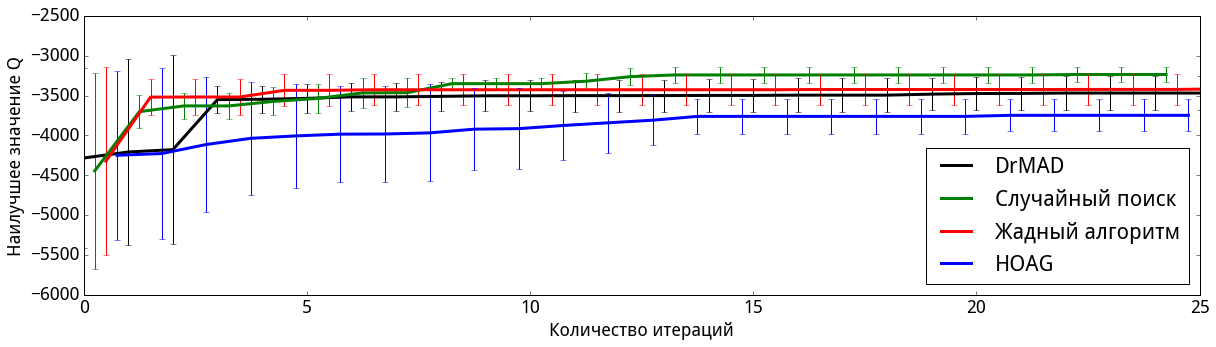

In [10]:
id = -1

font = {'family': 'Droid Sans',
        'weight': 'normal',
       'size':18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 5)
plt.xlabel(u'Количество итераций', fontsize=18)
plt.ylabel(u'Наилучшее значение Q', fontsize=18)


for dataset, label, c in [(mad, 'DrMAD', 'k'), 
                         (rand, u'Случайный поиск', 'g'),
                         (greed, u'Жадный алгоритм', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    
    line = []
    for b in dataset:
        print label
        
        history = []
        for i in xrange(0, len(b.history)):
        
            best_value = max([h[1] for h in b.history[:i+1]])
            
            history.append(best_value)
        line.append(history)
    print label, line[-1][0]
    print label,  np.mean(np.array(line)[:,-1])
    #print np.mean(line, axis=0)[-1]
    
    #plt.fill_between(range(len( np.mean(line, axis=0))),  np.mean(line, axis=0)-np.std(line, axis=0), np.mean(line, axis=0)+np.std(line, axis=0), facecolor=c, alpha=0.25 )
    plt.errorbar(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0), yerr=np.std(line, axis=0), c=c, lw=1)
    plt.plot(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0),  c=c, lw=3, label=label)
    #plt.plot( np.mean(line, axis=0), label=label, c=c, lw=3)
#plt.ylim((-1000000, -1160000))
plt.xlim((0,25))
plt.legend(loc='best')


DrMAD
0.017936
Случайный поиск
0.017972
Жадный алгоритм
0.021132
HOAG
0.02054


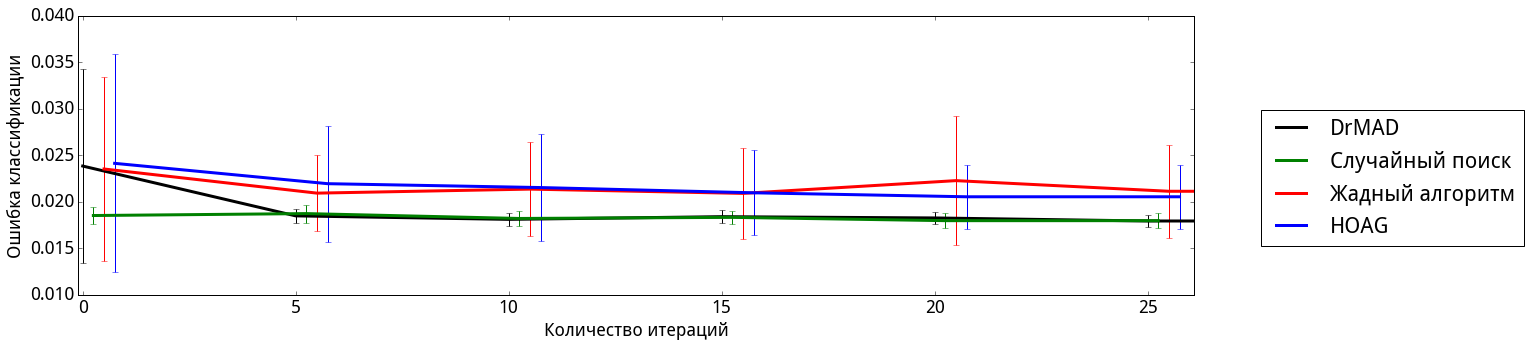

In [13]:
#amad
#arand
#ahoag
id = -1

font = {'family': 'Droid Sans',
        'weight': 'normal',
       'size':18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 5)
plt.xlabel(u'Количество итераций', fontsize=18)
plt.ylabel(u'Ошибка классификации', fontsize=18)


for dataset, label, c in [(amad, 'DrMAD', 'k'), 
                         (arand, u'Случайный поиск', 'g'),
                         (agreed, u'Жадный алгоритм', 'r'),
                         (ahoag, 'HOAG', 'b')
                          ]:
    id+=1
    
    line = []
    for b in dataset:
        b = b+[b[-1]]
        #print label
        
            
        
        line.append(b)
    #line = line[:2]
    #print np.array(line).shape
    #print line
    print label
    print np.mean(line, axis=0)[-1]
   
    #plt.fill_between(range(len( np.mean(line, axis=0))),  np.mean(line, axis=0)-np.std(line, axis=0), np.mean(line, axis=0)+np.std(line, axis=0), facecolor=c, alpha=0.25 )
    #print 'std', np.std(line, axis=0)
    plt.errorbar(np.array(range(len(line[0])))*5+id*1.0/4, np.mean(line, axis=0), yerr=np.std(line, axis=0), c=c, lw=1)
    plt.plot(np.array(range(len(line[0])))*5+id*1.0/4, np.mean(line, axis=0),  c=c, lw=3, label=label)
    
    #plt.plot( np.mean(line, axis=0), label=label, c=c, lw=3)
#plt.ylim((-1000000, -1160000))
plt.xlim((-0.1,26.1))
plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,0.7))

In [ ]:
import theano.tensor as T
param_num = X_train.shape[1] * 50 + 50 + 50  + 1

lr = theano.shared(10**(-5))
alphas = theano.shared(np.array([1.0, 1.0]))
real_alphas = T.concatenate([T.repeat(alphas[0],  X_train.shape[1] * 50 + 50)   , T.repeat(alphas[1],  50 + 1) ])
optimizer = partial(gd_optimizer, learning_rate=lr)
inits = [np.sqrt(2.0/(X_train.shape[1] + 50)).astype(theano.config.floatX), np.sqrt(2.0/(50 + 1)).astype(theano.config.floatX)]

model_build = partial(build_feedforward,  structure = [X_train.shape[1],50, 1],   init_sigmas=inits, nonlinearity=lambda x:T.nnet.relu(x), log_alphas =real_alphas, bias=True)


training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=25 )



X_t = T.matrix()
result = []

predicts = []

for m in training_procedure.models:    
    predict = m.predict_var(X_t)
    predicts.append(theano.function([X_t], predict))
print 'start'
id = -1
for dataset, label, c in [#(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         #(greed, 'Greed', 'r'),
                         #(hoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []

    for b in dataset:

        history = []
        
        for i in xrange(0, len(b.history), 10):
            
            best_value = np.argmax([h[1] for h in b.history[:i+1]])
            #print best_value
            best_value = b.history[best_value][0]
            # if i==len(b.history)-1:
            #     print best_value[0]

            alphas.set_value(best_value[0])
            #alphas.set_value(np.array([1.0, 1.0]))
         


            for tr in xrange(10000):
                res = training_procedure.do_train()
                if tr%1000 == 0:
                    print tr, res
            print training_procedure.do_validation()
            res = []
            res = np.sqrt(np.mean((predicts[0](X_test)[:,0]-Y_test)**2))
            
            history.append(res)
            
        line.append(history)
        


        """
        bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
         [alpha_ranges, lr_ranges], verbose=100))
        X = T.matrix()    
        model = model_build(dataset_size=100)


        """

    plt.errorbar(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0), yerr=np.std(line, axis=0), c=c, lw=1, label=label)
    print  np.mean(line, axis=0)[-1], np.std(line, axis=0)[-1]
#plt.ylim((0.0, 0.1))
plt.legend(loc='best')
print history

start
Random
0 -1596159.4304
1000 -1595551.64663
2000 -1595555.97557
3000 -1595556.46432
4000 -1595556.35917
5000 -1595559.22239
6000 -1595558.02825
7000 -1595553.88683
8000 -1595558.23841
9000 -1595559.07986
-1595555.6609
0 -1493126.03056
1000 -1356358.50059
2000 -1356359.01795
3000 -1356360.29983
4000 -1356358.5854
5000 -1356362.37543
6000 -1356359.07208
7000 -1356356.08376
8000 -1356370.51671
9000 -1356362.73039
-1356360.26979
0 -1356257.79965
1000 -1356254.92875
2000 -1356260.43295
3000 -1356255.77099
4000 -1356257.42135
5000 -1356259.74499
6000 -1356257.56353
7000 -1356257.40945
8000 -1356254.90495


In [37]:
batch_size = 25
lr = theano.shared(10**(-5))
log_alphas = theano.shared(np.array([10.0]))

optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward,  structure = [X_train.shape[1], 50,   1],  init_sigmas=[0.001]*3,  nonlinearity=lambda x:T.nnet.relu(x), log_alphas=log_alphas, bias=True)
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,   batch_size=batch_size )
model = model_build(params=training_procedure.models[0].params, dataset_size=1)
X = T.matrix()
predict = theano.function([X], model.predict_var(X))

def mse(Y1, Y2):
    return np.sum((Y1 - Y2)**2)

#100 epochs, 2500/25 ~ 100 iterations
err = []
Y = predict(X_test)
err.append(mse(Y[:,0], Y_test))
for epoch in xrange(100):
    
    for i in xrange(100):
        training_procedure.do_train()
    
    Y = predict(X_test)
    err.append(mse(Y[:,0], Y_test))
    

    

<Container object of 3 artists>

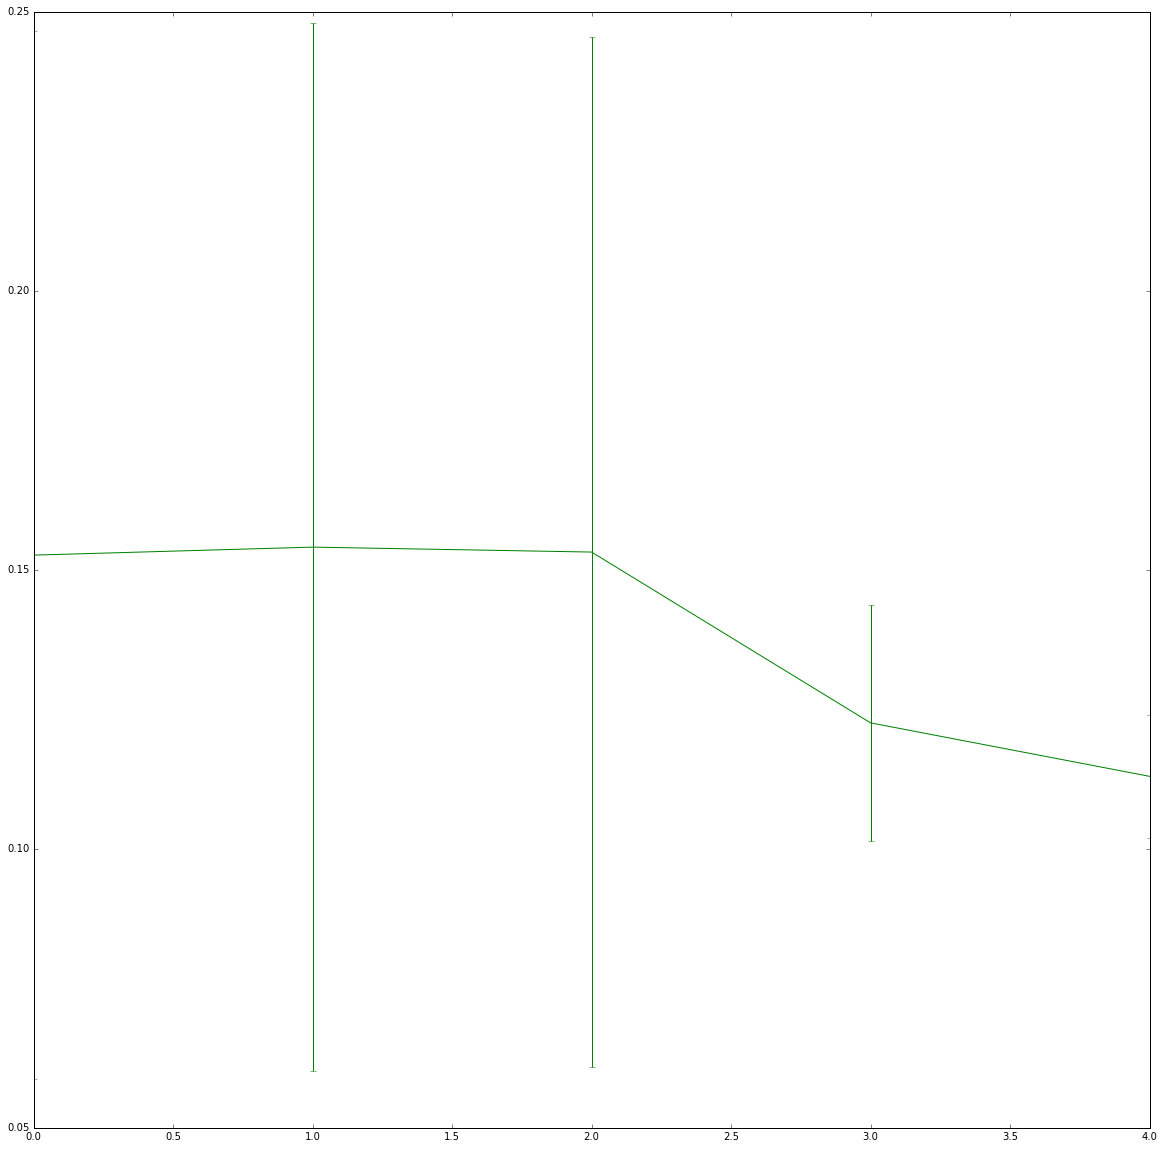

In [19]:
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []

    for b in dataset:

        history = []
        for i in xrange(len(b.history)):

            best_value = np.max([h[1] for h in b.history[:i+1]])
            history.append(best_value)
        history = np.array(history)
        history = history[-1]/history
        history = np.where(history>=0.99)[0]
       
        line.append(np.min(history))
        

        """
        bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
         [alpha_ranges, lr_ranges], verbose=100))
        X = T.matrix()    
        model = model_build(dataset_size=100)


        """
    print np.mean(line), np.median(line), np.std(line)

MrMAD
16.7 2.0 19.3847878503
Random
16.0 16.0 11.2178429299
Greed
9.7 9.5 6.30634601017
HOAG
13.96 0.0 18.0032885885


[0,
 0,
 0,
 0,
 0,
 41,
 41,
 0,
 42,
 20,
 0,
 21,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 45,
 21,
 38,
 0,
 38,
 0,
 21,
 0,
 40,
 0,
 21,
 41,
 0,
 38,
 0,
 0,
 40,
 41,
 0,
 41,
 44,
 0,
 21,
 1,
 41]

In [18]:
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    history = []
    for b in dataset:
        best_value = np.max([h[1] for h in b.history])
        history.append(best_value)
    print label, np.mean(history), np.std(history)

MrMAD -84.3734550695 2.64868121711
Random -79.0795962452 0.579801774023
Greed -81.2431813983 2.55392428429
HOAG -83.769210776 2.88260320189


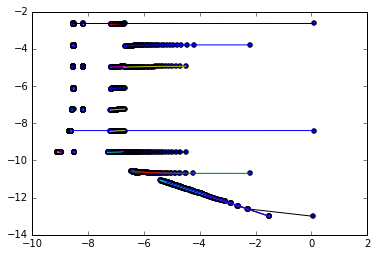

In [15]:
dataset = hoag
import theano.tensor as T
lr = theano.shared(0.01)
alphas = theano.shared(np.array([1.0, 1.0]))
optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas =alphas, bias=False)
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=100 )

for d in dataset:
    X_, Y_ = [], []
    for h in d.history:
        alphas.set_value(h[0][0])
        for _ in xrange(10):
              training_procedure.do_train()
        X_.append(np.linalg.norm(training_procedure.models[0].params.eval() - np.array([20, 100])))
        Y_.append(np.linalg.norm(np.exp(h[0][0]- np.array([2713%100, 2713/100]))))
    plt.scatter(np.log(X_),np.log(Y_))
    plt.plot(np.log(X_),np.log(Y_))

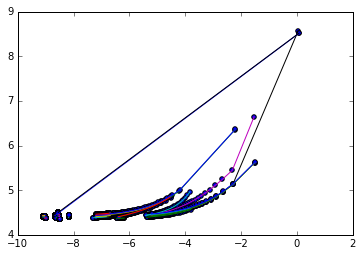

In [18]:
dataset = hoag
import theano.tensor as T
lr = theano.shared(0.01)
alphas = theano.shared(np.array([1.0, 1.0]))
optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas =alphas, bias=False)
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=100 )

for d in dataset:
    X_, Y_ = [], []
    for h in d.history:
        alphas.set_value(h[0][0])
        for _ in xrange(10):
              training_procedure.do_train()
        X_.append(np.linalg.norm(training_procedure.models[0].params.eval() - np.array([20, 100])))
        Y_.append(h[-1])
    plt.scatter(np.log(X_),np.log(-np.array(Y_)))
    plt.plot(np.log(X_),np.log(-np.array(Y_)))

In [8]:
Y_

[array(-277.29114686678855),
 array(-172.0529722751367),
 array(-144.604822027735),
 array(-130.54732451849281),
 array(-121.83425910611308),
 array(-115.85820765135955),
 array(-111.48760719898455),
 array(-108.14485094732697),
 array(-105.50206663098866),
 array(-103.35849231157151),
 array(-101.58397161486275),
 array(-100.0902594319505),
 array(-98.81532630205706),
 array(-97.71425190236292),
 array(-96.75368167212932),
 array(-95.90831490367741),
 array(-95.15860334906061),
 array(-94.48919871332782),
 array(-93.8878786398681),
 array(-93.34478712966856),
 array(-92.85188674876497),
 array(-92.40255664053902),
 array(-91.99129289576109),
 array(-91.61348205119077),
 array(-91.26522766886708),
 array(-90.94321600289554),
 array(-90.64461082999833),
 array(-90.3669703030455),
 array(-90.1081806203322),
 array(-89.8664026664511),
 array(-89.64002875450987),
 array(-89.42764730396243),
 array(-89.22801380386706),
 array(-89.04002679270404),
 array(-88.86270787075387),
 array(-88.69518

In [5]:
id = -1
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')                          ]:
    id+=1
    print label
    line = []

    for b in dataset:

        
        #for i in xrange(len(b.history)):
        track = [h[1] for h in b.history]
        track = [t-track[0] for t in track]
        best = np.max(track)
        need_value = best*0.99
        track = np.where(track>=need_value)[0]
        line.append(np.min(track))
        #best_value = np.argmax([h[1] for h in b.history])
        #line.append(best_value)
        
        #history = np.array(history)
        
        #history = history[-1]/history
        
        #history = [history[i-1]/history[i] for i in range(1, len(history))]# history#np.where(history>=0.99)[0]
        
        #history = np.where(history>=0.99)[0]
        #line.append(np.min(history))
        

        """
        bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
         [alpha_ranges, lr_ranges], verbose=100))
        X = T.matrix()    
        model = model_build(dataset_size=100)


        """
        
    print np.mean(line), np.std(line)

MrMAD
17.0 5.65685424949
Random
7.8 1.93907194297
Greed
10.8 10.4575331699
HOAG
8.6 7.39188744503


In [9]:
arand

[[0.0172, 0.0184, 0.017399999999999999, 0.016799999999999999, 0.0178],
 [0.018700000000000001,
  0.017100000000000001,
  0.018800000000000001,
  0.017999999999999999,
  0.0183],
 [0.0177,
  0.0183,
  0.019199999999999998,
  0.018700000000000001,
  0.017299999999999999],
 [0.019, 0.017500000000000002, 0.0184, 0.0189, 0.017399999999999999],
 [0.018800000000000001,
  0.019300000000000001,
  0.0189,
  0.018100000000000002,
  0.016799999999999999],
 [0.0184,
  0.017100000000000001,
  0.018599999999999998,
  0.017899999999999999,
  0.017399999999999999],
 [0.018599999999999998,
  0.0189,
  0.018100000000000002,
  0.018499999999999999,
  0.0189],
 [0.018700000000000001,
  0.019599999999999999,
  0.018100000000000002,
  0.017500000000000002,
  0.019],
 [0.018200000000000001,
  0.017600000000000001,
  0.018100000000000002,
  0.0166,
  0.017899999999999999],
 [0.017999999999999999,
  0.018599999999999998,
  0.0184,
  0.017000000000000001,
  0.018800000000000001],
 [0.0178,
  0.018499999999999999